# Analyzing Receipts with Form Recognizer

![A robot holding a receipt](./images/receipt_analysis.jpg)

In the artificial intelligence (AI) field of computer vision, optical character recognition (OCR) is commonly used to read printed or handwritten documents. Often, the text is simply extracted from the documents into a format that can be used for further processing or analysis.

A more advanced OCR scenario is the extraction of information from forms, such as purchase orders or invoices, with a semantic understanding of what the fields in the form represent. The **Form Recognizer** service is specifically designed for this kind of AI problem.

## View a receipt

In this example, you'll use the Form Recognizer's built-in model for analyzing receipts.

Click the **Run cell** (&#9655;) button (to the left of the cell) below to run it and see an example of a receipt that you'll use Form Recognizer to analyze.

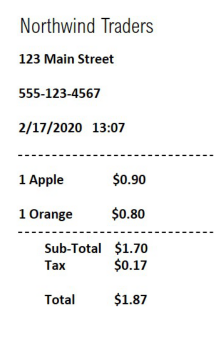

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline


# Load and display a receipt image
fig = plt.figure(figsize=(6, 6))
image_path = os.path.join('data', 'form-receipt', 'receipt.jpg')
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

## Create a Form Recognizer resource

Start by creating a Form Recognizer resource in your Azure subscription:

1. In another browser tab, open the Azure portal at https://portal.azure.com, signing in with your Microsoft account.
2. Select **+ Create a resource**, and search for *Form Recognizer*.
3. In the list of services, select **Form Recognizer**.
4. In the **Form Recognizer** blade, select **Create**.
5. In the **Create** blade, enter the following details and select **Create**
   - **Name**: A unique name for your service
   - **Subscription**: Your Azure subscription
   - **Region**: Any available region
   - **Pricing tier**: F0
   - **Resource Group**: The existing resource group you used previously
   - **I confirm I have read and understood the notice below**: Selected.
6. Wait for the service to be created.
7. View your newly created Form Recognizer service in the Azure portal and on the **Keys and Endpoint** page, copy the **Key1** and **Endpoint** values and paste them in the code cell below, replacing **YOUR_FORM_KEY** and **YOUR_FORM_ENDPOINT**.

In [1]:
form_key = 'fb3dd64607744395a481509caa647307'
form_endpoint = 'https://vishal-form-recognizer.cognitiveservices.azure.com/'

print('Ready to use form recognizer at {} using key {}'.format(form_endpoint, form_key))

Ready to use form recognizer at https://vishal-form-recognizer.cognitiveservices.azure.com/ using key fb3dd64607744395a481509caa647307


## Analyze a receipt

Now you're ready to use Form Recognizer to analyze a receipt.

In [2]:
import os
from azure.ai.formrecognizer import FormRecognizerClient
from azure.core.credentials import AzureKeyCredential

# Create a client for the form recognizer service
form_recognizer_client = FormRecognizerClient(endpoint=form_endpoint, credential=AzureKeyCredential(form_key))

try:
    print("Analyzing receipt...")
    # Get the receipt image file
    image_path = os.path.join('data', 'form-receipt', 'receipt.jpg')

    # Submit the file data to form recognizer
    with open(image_path, "rb") as f:
        analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)
    
    # Get the results
    receipt_data = analyze_receipt.result()

    # Print the extracted data for the first (and only) receipt
    receipt = receipt_data[0]
    receipt_type = receipt.fields.get("ReceiptType")
    if receipt_type:
        print("Receipt Type: {}".format(receipt_type.value))
    merchant_address = receipt.fields.get("MerchantAddress")
    if merchant_address:
        print("Merchant Address: {}".format(merchant_address.value))
    merchant_phone = receipt.fields.get("MerchantPhoneNumber")
    if merchant_phone:
        print("Merchant Phone: {}".format(merchant_phone.value))
    transaction_date = receipt.fields.get("TransactionDate")
    if transaction_date:
        print("Transaction Date: {}".format(transaction_date.value))
    print("Receipt items:")
    items = receipt.fields.get("Items")
    if items:
        for idx, item in enumerate(receipt.fields.get("Items").value):
            print("\tItem #{}".format(idx+1))
            item_name = item.value.get("Name")
            if item_name:
                print("\t - Name: {}".format(item_name.value))
            item_total_price = item.value.get("TotalPrice")
            if item_total_price:
                print("\t - Price: {}".format(item_total_price.value))
    subtotal = receipt.fields.get("Subtotal")
    if subtotal:
        print("Subtotal: {} ".format(subtotal.value))
    tax = receipt.fields.get("Tax")
    if tax:
        print("Tax: {}".format(tax.value))
    total = receipt.fields.get("Total")
    if total:
        print("Total: {}".format(total.value))

except Exception as ex:
    print('Error:', ex)


Analyzing receipt...
Receipt Type: Itemized
Merchant Address: 123 Main Street
Merchant Phone: +15551234567
Transaction Date: 2020-02-17
Receipt items:
	Item #1
	 - Name: Apple
	 - Price: 0.9
	Item #2
	 - Name: Orange
	 - Price: 0.8
Subtotal: 1.7 
Tax: 0.17
Total: 1.87


Note that Form Recognizer is able to interpret the data in the form, correctly identifying the merchant address and phone number, and the transaction date and time, as well as the line items, subtotal, tax, and total amounts.

## More Information

For more information about the Form Recognizer service, see [the Form Recognizer documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/form-recognizer/index)